<a href="https://colab.research.google.com/github/brianhphillips/testrepo/blob/main/DecTree_Penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import libraries
import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [2]:
# Step 2: Download the dataset
path = kagglehub.dataset_download("amulyas/penguin-size-dataset")
print("Path to dataset files:", path)

100%|██████████| 2.85k/2.85k [00:00<00:00, 5.95MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/amulyas/penguin-size-dataset/versions/1


In [3]:
# Step 3: Load dataset
data_path = f"{path}/penguins_size.csv"
df = pd.read_csv(data_path)

In [4]:
# Step 4: Split features and target
X = df.drop('species', axis=1)
y = df['species']

In [5]:
# Step 5: Handle categorical features using one-hot encoding
# Identify object type columns which are likely categorical strings
categorical_cols = X.select_dtypes(include='object').columns
# Apply one-hot encoding to these columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True) # drop_first avoids multicollinearity

In [6]:
# Step 6: Split into train and test (optional for visualization)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [7]:
# Step 7: Train Decision Tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

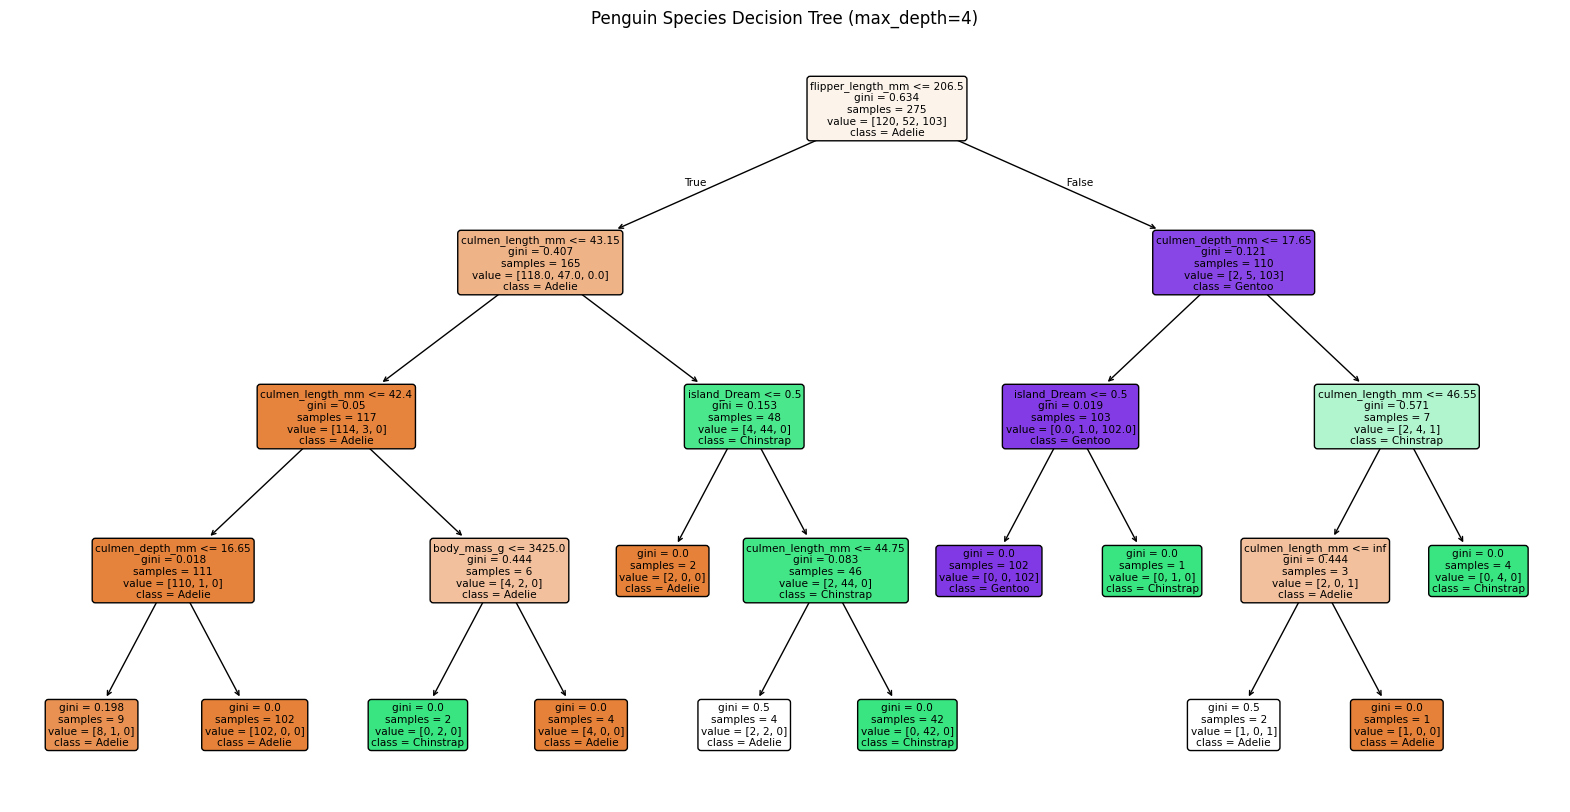

In [8]:
# Step 8: Visualize the tree
plt.figure(figsize=(20, 10))
# Use the column names from X_encoded as feature names
plot_tree(clf, feature_names=X_encoded.columns, class_names=clf.classes_, filled=True, rounded=True)
plt.title("Penguin Species Decision Tree (max_depth=4)")
plt.show()